<a href="https://colab.research.google.com/github/priscilaxrc/TCCUSPMonkeyPox/blob/main/USP_01_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho TCC USP

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
#!pip3 install -U pyFTS
!pip3 install SimpSOM
!pip install dispy
#!pip install matplotlib==3.1.3
!pip install matplotlib==3.1.1

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-3ezlc0ly
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-3ezlc0ly
  Resolved https://github.com/PYFTS/pyFTS to commit 4e0ee7cdd9fc9a8ac9170c0c3496536ef0378cb7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


  Using cached matplotlib-3.1.1-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.1 which is incompatible.
mizani 0.9.2 requires matplotlib>=3.5.0, but you have matplotlib 3.1.1 which is incompatible.
plotnine 0.12.2 requires matplotlib>=3.6.0, but you have matplotlib 3.1.1 which is incompatible.
simpsom 2.0.2 requires matplotlib>=3.3.3, but you have matplotlib 3.1.1 which is incompatible.


In [80]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

In [81]:
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets = {}

#dff = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosFalha.xlsx')
dff = pd.read_csv('../content/drive/MyDrive/TCCPriscila/Teste_Daily_Country_Wise_Confirmed_Cases.csv', ';')

#dfn = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosNormais.xlsx')
#dfn = pd.read_csv('../content/drive/MyDrive/TCCPriscila/Teste_Daily_Country_Wise_Confirmed_Cases.csv', ';')

dados = dff[0:112]
#dados_teste_Falha = dff[0:112]

In [82]:
print(dados)#print dados
dados2=dados.T

                      Country  23/05/2022  24/05/2022  25/05/2022  26/05/2022  \
0                     Nigeria           0           0           0           0   
1                    Cameroon           0           0           0           0   
2    Central African Republic           0           0           0           0   
3           Republic of Congo           0           0           0           0   
4                     England          36          14           7          24   
..                        ...         ...         ...         ...         ...   
107                    Jordan           0           0           0           0   
108                      Guam           0           0           0           0   
109                   Ukraine           0           0           0           0   
110                   Bahrain           0           0           0           0   
111                     China           0           0           0           0   

     27/05/2022  28/05/2022

In [83]:
teste1 = dados2[8]
teste11 = teste1[1:]
teste2 = dados2[7]
teste22 = teste2[1:]
teste3 = dados2[4]
teste33 = teste3[1:]
teste4 = dados2[12]
teste44 = teste4[1:]
teste5 = dados2[38]
teste55 = teste5[1:]

In [84]:
#Dados
from statsmodels.tsa.stattools import acf, pacf

datasets1 = {}

datasets1['EUA'] = teste11
datasets1['Spain'] = teste22
datasets1['UK'] = teste33
datasets1['France'] = teste44
datasets1['Brazil'] = teste55

print(datasets1)

{'EUA': 23/05/2022      0
24/05/2022      2
25/05/2022      2
26/05/2022      5
27/05/2022      4
             ... 
18/09/2022      0
19/09/2022    391
20/09/2022    311
21/09/2022    157
22/09/2022    205
Name: 8, Length: 123, dtype: object, 'Spain': 23/05/2022     1
24/05/2022     4
25/05/2022     8
26/05/2022    25
27/05/2022    21
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    46
21/09/2022     0
22/09/2022     0
Name: 7, Length: 123, dtype: object, 'UK': 23/05/2022    36
24/05/2022    14
25/05/2022     7
26/05/2022    24
27/05/2022     0
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    29
21/09/2022     0
22/09/2022     0
Name: 4, Length: 123, dtype: object, 'France': 23/05/2022    10
24/05/2022     0
25/05/2022     0
26/05/2022    11
27/05/2022     0
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    18
21/09/2022     8
22/09/2022     0
Name: 12, Length: 123, dtype: object, 'Brazil': 23/05/2022      0
24/05/2022      0
25/05/2022   

## Training procedure

### Definition of the Universe of Discourse U & Linguistic variable creation

The Universe of Discourse (U) partitioners are responsible for identifying U, split the partitions and create their fuzzy sets. There are several ways to partition U and this has a direct impact on the accuracy of the predictive model.

For this example we are using grid partitioning, where all sets are equal. The default membership function is triangular.

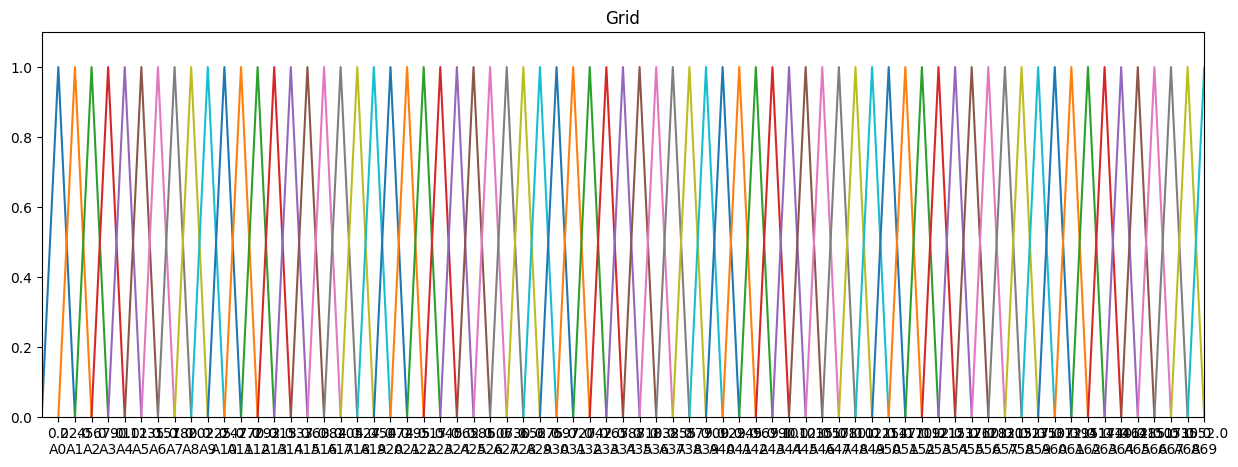

In [85]:
from pyFTS.partitioners import Grid

data = datasets1['EUA']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [86]:
print(data1)

23/05/2022      0
24/05/2022      2
25/05/2022      2
26/05/2022      5
27/05/2022      4
             ... 
26/08/2022    499
27/08/2022      0
28/08/2022      0
29/08/2022    650
30/08/2022    312
Name: 8, Length: 100, dtype: object


### Fuzzyfication

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [87]:
fuzzyfied = fs.fuzzyfy(data1.values, method='maximum', mode='sets')

fuzzyfied

['A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A0',
 'A1',
 'A0',
 'A1',
 'A1',
 'A0',
 'A0',
 'A0',
 'A0',
 'A2',
 'A1',
 'A1',
 'A1',
 'A0',
 'A0',
 'A3',
 'A2',
 'A2',
 'A3',
 'A3',
 'A0',
 'A0',
 'A0',
 'A6',
 'A2',
 'A6',
 'A3',
 'A0',
 'A0',
 'A4',
 'A3',
 'A5',
 'A8',
 'A15',
 'A0',
 'A0',
 'A10',
 'A5',
 'A9',
 'A8',
 'A17',
 'A0',
 'A0',
 'A26',
 'A14',
 'A38',
 'A12',
 'A12',
 'A0',
 'A0',
 'A27',
 'A23',
 'A13',
 'A22',
 'A18',
 'A0',
 'A0',
 'A63',
 'A25',
 'A40',
 'A16',
 'A18',
 'A0',
 'A0',
 'A32',
 'A35',
 'A36',
 'A27',
 'A0',
 'A0',
 'A0',
 'A58',
 'A21',
 'A30',
 'A14',
 'A22',
 'A0',
 'A0',
 'A29',
 'A14']

### Temporal patterns

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [88]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A0 -> A2', 'A2 -> A1', 'A0 -> A3', 'A3 -> A2', 'A2 -> A2', 'A2 -> A3', 'A3 -> A3', 'A3 -> A0', 'A0 -> A6', 'A6 -> A2', 'A2 -> A6', 'A6 -> A3', 'A0 -> A4', 'A4 -> A3', 'A3 -> A5', 'A5 -> A8', 'A8 -> A15', 'A15 -> A0', 'A0 -> A10', 'A10 -> A5', 'A5 -> A9', 'A9 -> A8', 'A8 -> A17', 'A17 -> A0', 'A0 -> A26', 'A26 -> A14', 'A14 -> A38', 'A38 -> A12', 'A12 -> A12', 'A12 -> A0', 'A0 -> A27', 'A27 -> A23', 'A23 -> A13', 'A13 -> A22', 'A22 -> A18', 'A18 -> A0', 'A0 -> A63', 'A63 -> A25', 'A25 -> A40', 'A40 -> A16', 'A16 -> A18', 'A0 -> A32', 'A32 -> A35', 'A35 -> A36', 'A36 -> A27', 'A27 -> A0', 'A0 -> A58', 'A58 -> A21', 'A21 -> A30', 'A30 -> A14', 'A14 -> A22', 'A22 -> A0', 'A0 -> A29', 'A29 -> A14']


### Rule generation

In [89]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data1.values)
print(model)

Conventional FTS:
A15 -> A0
A17 -> A0
A18 -> A0
A1 -> A0,A1
A3 -> A0,A2,A3,A5
A6 -> A2,A3
A2 -> A1,A2,A3,A6
A4 -> A3
A10 -> A5
A12 -> A0,A12
A9 -> A8
A5 -> A8,A9
A22 -> A0,A18
A27 -> A0,A23
A38 -> A12
A23 -> A13
A26 -> A14
A30 -> A14
A29 -> A14
A8 -> A15,A17
A40 -> A16
A16 -> A18
A0 -> A0,A1,A10,A2,A26,A27,A29,A3,A32,A4,A58,A6,A63
A58 -> A21
A13 -> A22
A63 -> A25
A36 -> A27
A14 -> A22,A38
A21 -> A30
A32 -> A35
A35 -> A36
A25 -> A40



##  Forecasting procedure

### Input value fuzzyfication

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [90]:
fuzzyfied = fs.fuzzyfy(18876, method='maximum', mode='sets')

print(fuzzyfied)

A69


### Find the compatible rules & Defuzzyfy

In [91]:
model.predict([18876])

[1552.1000000000001]

## Model's in sample performance

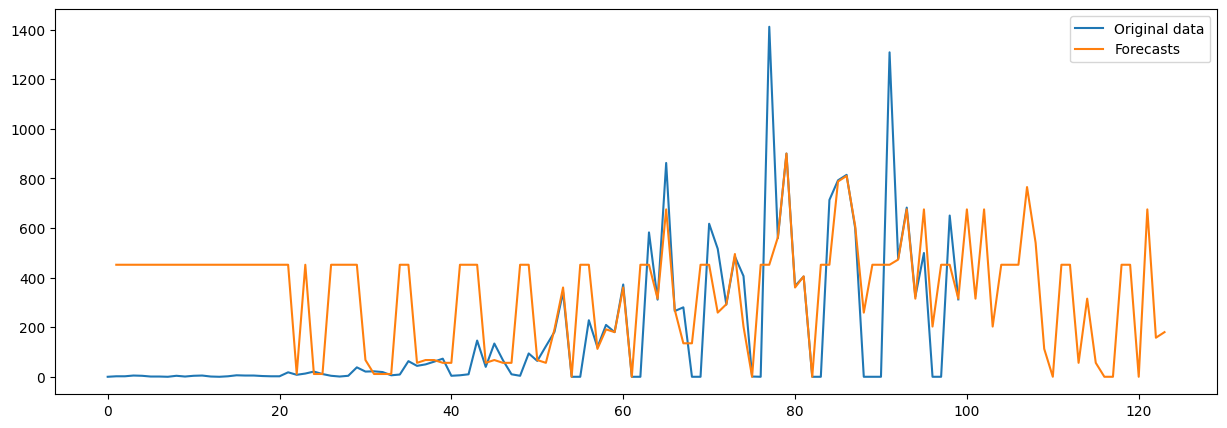

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plt.plot(data1.values, label="Original data")
pred, = plt.plot(forecasts, label="Forecasts")

plt.legend(handles=[orig, pred])

## General Process

Chen Conventional Fuzzy Time Series

Dados dos Estados Unidos

Conventional FTS:
A11 -> A0
A12 -> A0
A2 -> A0,A1,A2,A3
A4 -> A1,A2
A1 -> A1,A2,A4
A6 -> A3,A5
A3 -> A2,A5,A6
A10 -> A0,A11
A14 -> A0,A12
A8 -> A0,A14,A8
A17 -> A0,A15
A24 -> A8
A15 -> A8
A19 -> A9
A18 -> A9
A26 -> A10
A5 -> A10,A11
A37 -> A13
A40 -> A16
A0 -> A0,A16,A17,A18,A20,A3,A37,A4,A40,A6
A23 -> A17
A16 -> A26,A9
A9 -> A14,A24
A13 -> A19
A20 -> A22
A22 -> A23



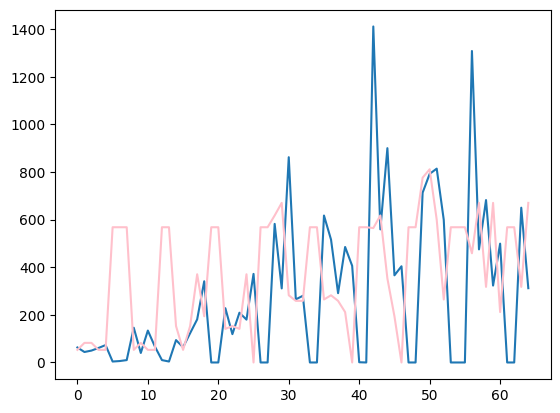

In [93]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import chen

#train = Enrollments.get_data()
train = data1.values[35:]
#test = Enrollments.get_data()
test = data1.values[35:]

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=45)

# Create an empty model using the Chen(1996) method
model = chen.ConventionalFTS(partitioner=partitioner)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)


#Plot
plt.plot(test)
plt.plot(forecasts, color= 'pink')

Estatísticas de Erro das Previsões Estados Unidos - Chen Conventional Fuzzy Time Series

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test,forecasts)
MAE = mean_absolute_error(test,forecasts)
MAPE = mean_absolute_percentage_error(test,forecasts)
MedAE = median_absolute_error(test,forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test,forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 158108.72
MAE = 316.06
MAPE = 550893124357360064.00
MedAE = 334.44
RMSE = 397.63
ME = 849.42


Dados do Brasil

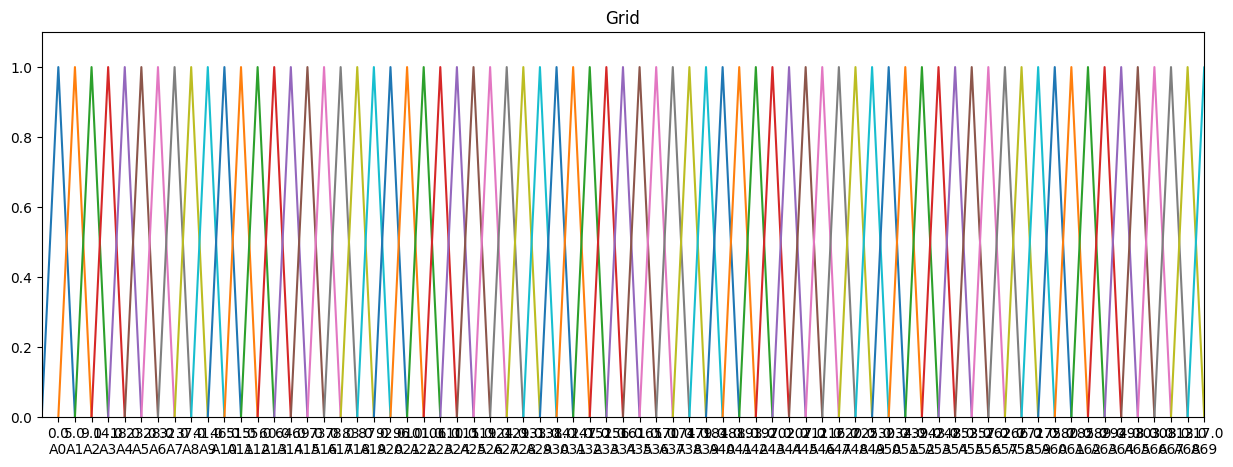

In [95]:
from pyFTS.partitioners import Grid

data = datasets1['Brazil']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

Conventional FTS:
A36 -> A0
A1 -> A0,A5
A5 -> A0,A4,A6
A2 -> A0,A12,A2
A17 -> A6
A6 -> A0,A13,A5
A4 -> A15,A2,A4,A5
A20 -> A14,A2
A14 -> A20,A3,A4,A6
A16 -> A12,A19,A8
A24 -> A13
A12 -> A0,A22,A27,A4
A0 -> A0,A1,A14,A16,A2,A31,A4,A40
A22 -> A10,A17
A40 -> A14
A28 -> A14
A15 -> A12,A18
A8 -> A16
A18 -> A16
A27 -> A12,A24
A19 -> A20
A3 -> A22
A31 -> A26
A13 -> A27,A28
A10 -> A36



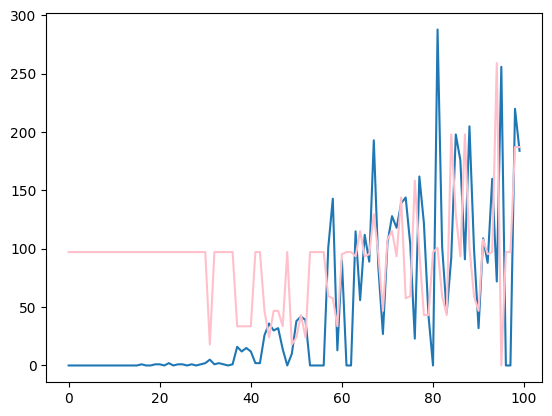

In [96]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import chen

#train = Enrollments.get_data()
train = data1.values
#test = Enrollments.get_data()
test = data1.values

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=45)

# Create an empty model using the Chen(1996) method
model = chen.ConventionalFTS(partitioner=partitioner)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)


#Plot
plt.plot(test)
plt.plot(forecasts, color= 'pink')

Estatísticas de Erro das Previsões Brasil - Chen Conventional Fuzzy Time Series


In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test,forecasts)
MAE = mean_absolute_error(test,forecasts)
MAPE = mean_absolute_percentage_error(test,forecasts)
MedAE = median_absolute_error(test,forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test,forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 7001.00
MAE = 69.74
MAPE = 144457461647536032.00
MedAE = 95.70
RMSE = 83.67
ME = 256.00


Dados Espanha

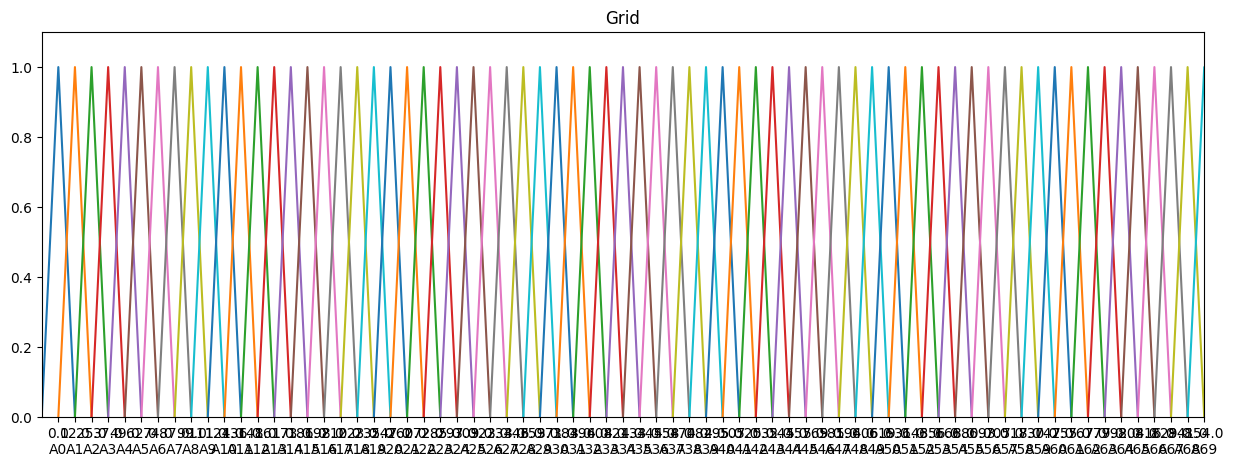

In [98]:
from pyFTS.partitioners import Grid

data = datasets1['Spain']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)


Conventional FTS:
A1 -> A0
A6 -> A0
A7 -> A0
A2 -> A0
A13 -> A0
A25 -> A0
A12 -> A0
A9 -> A0
A19 -> A0
A18 -> A0
A10 -> A0
A5 -> A0
A0 -> A0,A1,A10,A12,A13,A18,A19,A2,A25,A3,A5,A6,A7,A9



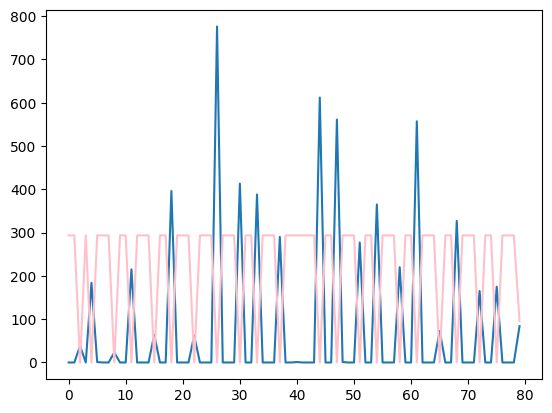

In [99]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import chen

#train = Enrollments.get_data()
train = data1.values[20:]
#test = Enrollments.get_data()
test = data1.values[20:]

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=28)

# Create an empty model using the Chen(1996) method
model = chen.ConventionalFTS(partitioner=partitioner)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)


#Plot
plt.plot(test)
plt.plot(forecasts, color= 'pink')

Estatísticas de Erro das Previsões Espanha - Chen Conventional Fuzzy Time Series

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test,forecasts)
MAE = mean_absolute_error(test,forecasts)
MAPE = mean_absolute_percentage_error(test,forecasts)
MedAE = median_absolute_error(test,forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test,forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 95987.96
MAE = 290.20
MAPE = 908946739079123968.00
MedAE = 293.57
RMSE = 309.82
ME = 776.00


Dados da França

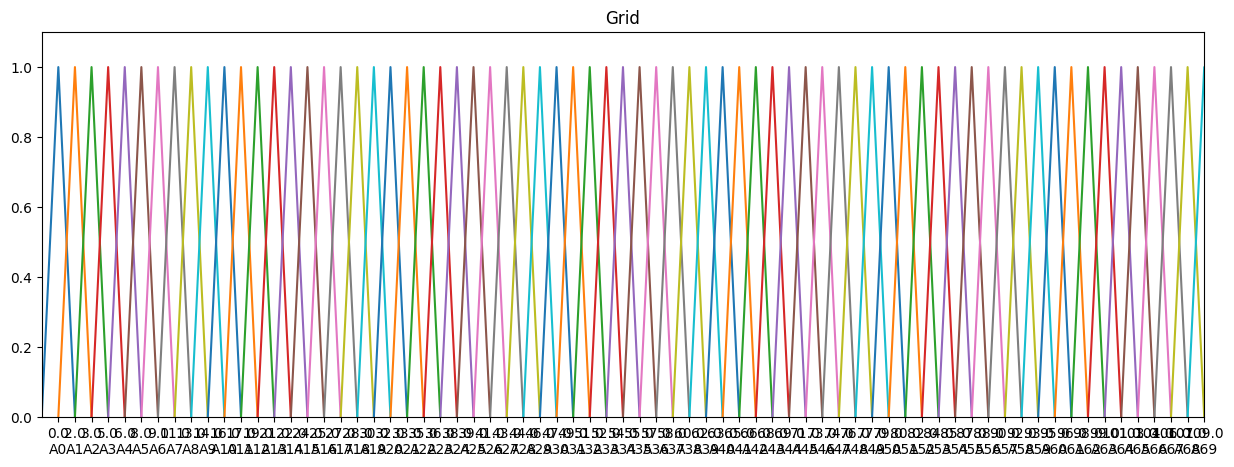

In [101]:
from pyFTS.partitioners import Grid

data = datasets1['France']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

Conventional FTS:
A5 -> A0
A10 -> A0
A40 -> A0
A3 -> A0
A16 -> A0
A27 -> A0
A12 -> A0
A26 -> A0
A19 -> A0
A18 -> A0
A2 -> A0,A1
A36 -> A1
A21 -> A1
A15 -> A0,A3
A22 -> A2
A8 -> A0,A2,A6
A7 -> A5,A6
A9 -> A7
A4 -> A10
A6 -> A15,A18,A8
A14 -> A12,A16
A1 -> A0,A19,A26
A0 -> A0,A10,A14,A15,A2,A21,A22,A27,A36,A4,A40,A6,A7,A8



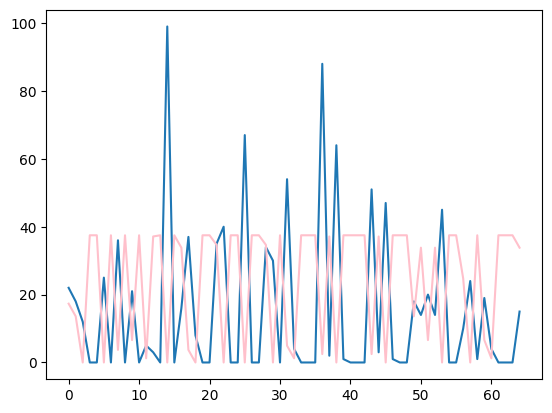

In [102]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import chen

#train = Enrollments.get_data()
train = data1.values[35:]
#test = Enrollments.get_data()
test = data1.values[35:]

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=45)

# Create an empty model using the Chen(1996) method
model = chen.ConventionalFTS(partitioner=partitioner)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)


#Plot
plt.plot(test)
plt.plot(forecasts, color= 'pink')

Estatísticas de Erro das Previsões França - Chen Conventional Fuzzy Time Series

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test,forecasts)
MAE = mean_absolute_error(test,forecasts)
MAPE = mean_absolute_percentage_error(test,forecasts)
MedAE = median_absolute_error(test,forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test,forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 1362.18
MAE = 32.14
MAPE = 70112137979115488.00
MedAE = 37.48
RMSE = 36.91
ME = 99.00


Dados do Reino Unido

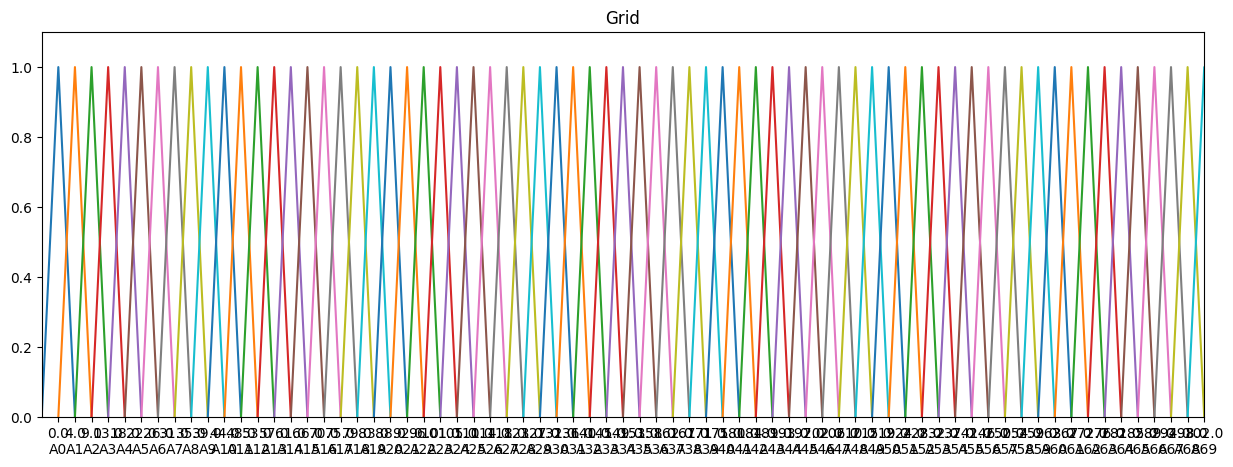

In [104]:
from pyFTS.partitioners import Grid

data = datasets1['UK']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

Conventional FTS:
A22 -> A0
A15 -> A0
A29 -> A0
A26 -> A0
A17 -> A0
A40 -> A0
A9 -> A0
A7 -> A0
A13 -> A0
A24 -> A0
A21 -> A0
A10 -> A0
A0 -> A0,A10,A13,A15,A17,A21,A22,A24,A26,A29,A40,A7,A9



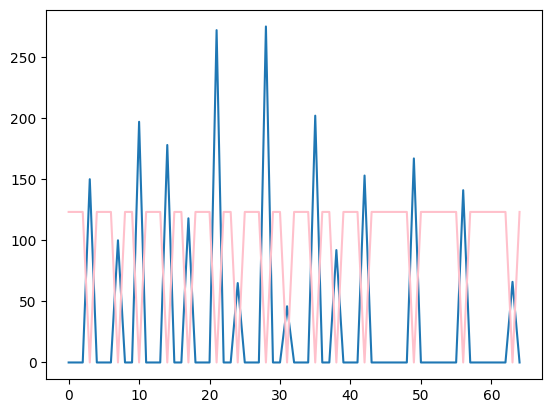

In [105]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import chen

#train = Enrollments.get_data()
train = data1.values[35:]
#test = Enrollments.get_data()
test = data1.values[35:]

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=45)

# Create an empty model using the Chen(1996) method
model = chen.ConventionalFTS(partitioner=partitioner)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)


#Plot
plt.plot(test)
plt.plot(forecasts, color= 'pink')

Estatísticas de Erro das Previsões Reino Unido - Chen Conventional Fuzzy Time Series

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test,forecasts)
MAE = mean_absolute_error(test,forecasts)
MAPE = mean_absolute_percentage_error(test,forecasts)
MedAE = median_absolute_error(test,forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test,forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 17797.58
MAE = 128.97
MAPE = 426875955804385344.00
MedAE = 123.22
RMSE = 133.41
ME = 275.00


Conventional High Order Fuzzy Logical Relationship Group

Dados dos Estados Unidos

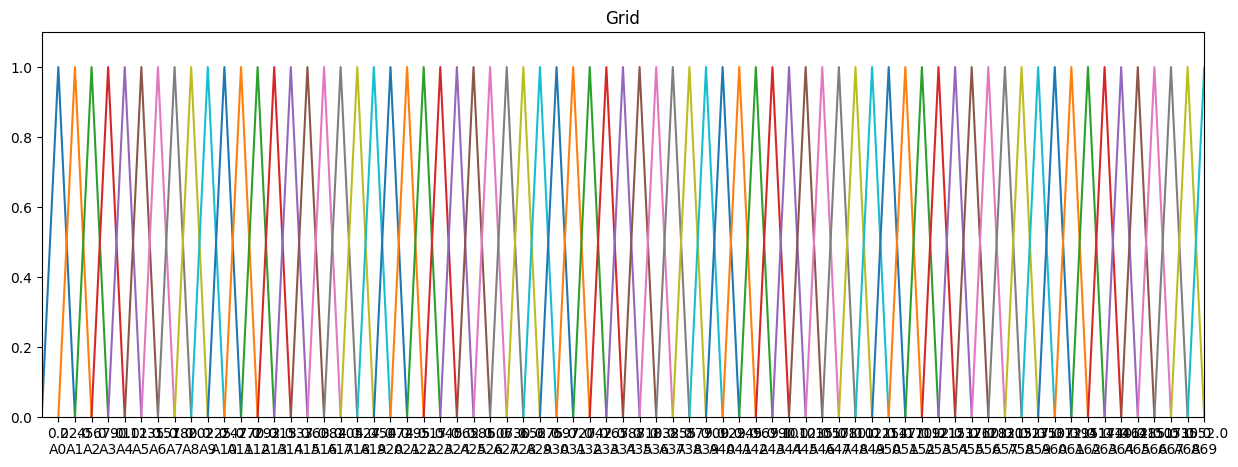

In [107]:
from pyFTS.partitioners import Grid

data = datasets1['EUA']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

High Order FTS:
A2,A3,A5,A10 -> A0
A2,A3,A5,A11 -> A0
A2,A3,A6,A10 -> A0
A2,A3,A6,A11 -> A0
A2,A4,A5,A10 -> A0
A2,A4,A5,A11 -> A0
A2,A4,A6,A10 -> A0
A2,A4,A6,A11 -> A0
A3,A3,A5,A10 -> A0
A3,A3,A5,A11 -> A0
A3,A3,A6,A10 -> A0
A3,A3,A6,A11 -> A0
A3,A4,A5,A10 -> A0
A3,A4,A5,A11 -> A0
A3,A4,A6,A10 -> A0
A3,A4,A6,A11 -> A0
A3,A5,A10,A0 -> A0
A3,A5,A11,A0 -> A0
A3,A6,A10,A0 -> A0
A3,A6,A11,A0 -> A0
A4,A5,A10,A0 -> A0
A4,A5,A11,A0 -> A0
A4,A6,A10,A0 -> A0
A4,A6,A11,A0 -> A0
A3,A6,A5,A11 -> A0
A3,A6,A5,A12 -> A0
A3,A6,A6,A11 -> A0
A3,A6,A6,A12 -> A0
A3,A7,A5,A11 -> A0
A3,A7,A5,A12 -> A0
A3,A7,A6,A11 -> A0
A3,A7,A6,A12 -> A0
A4,A6,A5,A11 -> A0
A4,A6,A5,A12 -> A0
A4,A6,A6,A11 -> A0
A4,A6,A6,A12 -> A0
A4,A7,A5,A11 -> A0
A4,A7,A5,A12 -> A0
A4,A7,A6,A11 -> A0
A4,A7,A6,A12 -> A0
A6,A5,A11,A0 -> A0
A6,A5,A12,A0 -> A0
A6,A6,A11,A0 -> A0
A6,A6,A12,A0 -> A0
A7,A5,A11,A0 -> A0
A7,A5,A12,A0 -> A0
A7,A6,A11,A0 -> A0
A7,A6,A12,A0 -> A0
A9,A27,A8,A8 -> A0
A9,A27,A8,A9 -> A0
A9,A27,A9,A8 -> A0
A9,A27,A9,A9 ->

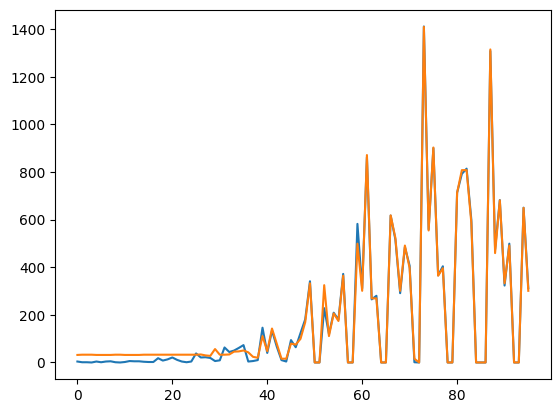

In [108]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import hofts
from pyFTS.common import Util as cUtil

#train = Enrollments.get_data()
train = data1.values
#test = Enrollments.get_data()
test = data1.values

ordem = 4
particao = 50

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=particao)

# Create an empty model using the hofts method
model = hofts.HighOrderFTS(partitioner=partitioner,order=ordem)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)

#calculo maximo minimo e diferenca para utilizar calculo de erro percentual
#calculo de erro percentual
maxvalue = max(test)
minValue = min(test)
diffRange = maxvalue - minValue

#Plot
plt.plot(test[ordem:])
plt.plot(forecasts)

### Referencia

https://github.com/danmorales/CursoDS_ProfDanilo/blob/master/Time_Series/ARIMA_Model/ARIMA_Model_Temperatura.ipynb


https://docs.oracle.com/cloud/help/pt_BR/pbcs_common/CSPPU/rmse.htm#CSPPU-pp_user_book_204

Estatísticas de Erro das Previsões Estados Unidos - High Order Fuzzy Logical Relationship Group

In [109]:
#Calculo de Erro
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test[ordem:],forecasts)
MAE = mean_absolute_error(test[ordem:],forecasts)
MAPE = mean_absolute_percentage_error(test[ordem:],forecasts)
MedAE = median_absolute_error(test[ordem:],forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test[ordem:],forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 495.30
MAE = 15.45
MAPE = 3064828077091012.50
MedAE = 10.55
RMSE = 22.26
ME = 96.67


Dados do Brasil

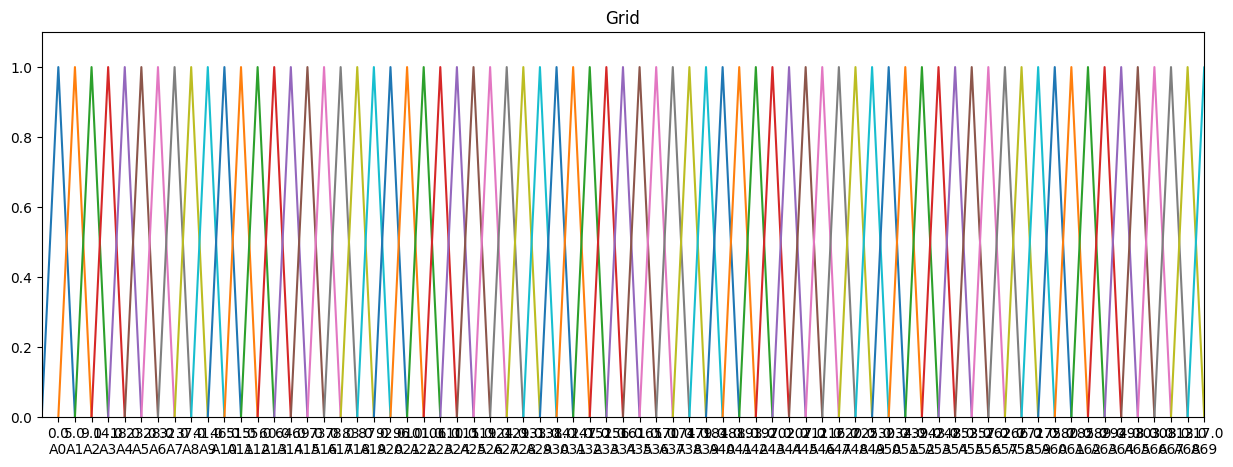

In [110]:
from pyFTS.partitioners import Grid

data = datasets1['Brazil']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

High Order FTS:
A5,A4,A4,A2 -> A0
A5,A4,A4,A3 -> A0
A5,A4,A5,A2 -> A0
A5,A4,A5,A3 -> A0
A5,A5,A4,A2 -> A0
A5,A5,A4,A3 -> A0
A5,A5,A5,A2 -> A0
A5,A5,A5,A3 -> A0
A6,A4,A4,A2 -> A0
A6,A4,A4,A3 -> A0
A6,A4,A5,A2 -> A0
A6,A4,A5,A3 -> A0
A6,A5,A4,A2 -> A0
A6,A5,A4,A3 -> A0
A6,A5,A5,A2 -> A0
A6,A5,A5,A3 -> A0
A1,A5,A6,A6 -> A0
A1,A5,A6,A7 -> A0
A1,A5,A7,A6 -> A0
A1,A5,A7,A7 -> A0
A1,A6,A6,A6 -> A0
A1,A6,A6,A7 -> A0
A1,A6,A7,A6 -> A0
A1,A6,A7,A7 -> A0
A2,A5,A6,A6 -> A0
A2,A5,A6,A7 -> A0
A2,A5,A7,A6 -> A0
A2,A5,A7,A7 -> A0
A2,A6,A6,A6 -> A0
A2,A6,A6,A7 -> A0
A2,A6,A7,A6 -> A0
A2,A6,A7,A7 -> A0
A5,A6,A6,A0 -> A0
A5,A6,A7,A0 -> A0
A5,A7,A6,A0 -> A0
A5,A7,A7,A0 -> A0
A6,A6,A6,A0 -> A0
A6,A6,A7,A0 -> A0
A6,A7,A6,A0 -> A0
A6,A7,A7,A0 -> A0
A6,A6,A0,A0 -> A0
A6,A7,A0,A0 -> A0
A7,A6,A0,A0 -> A0
A7,A7,A0,A0 -> A0
A6,A0,A0,A0 -> A0
A7,A0,A0,A0 -> A0
A15,A22,A2,A13 -> A0
A15,A22,A2,A14 -> A0
A15,A22,A3,A13 -> A0
A15,A22,A3,A14 -> A0
A15,A23,A2,A13 -> A0
A15,A23,A2,A14 -> A0
A15,A23,A3,A13 -> A0
A15,A23,A

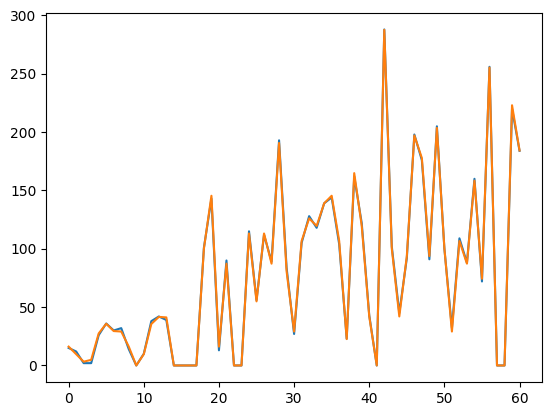

In [111]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import hofts
from pyFTS.common import Util as cUtil

#train = Enrollments.get_data()
train = data1.values[35:]
#test = Enrollments.get_data()
test = data1.values[35:]

ordem = 4
particao = 50

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=particao)

# Create an empty model using the hofts method
model = hofts.HighOrderFTS(partitioner=partitioner,order=ordem)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)

#calculo maximo minimo e diferenca para utilizar calculo de erro percentual
#calculo de erro percentual
maxvalue = max(test)
minValue = min(test)
diffRange = maxvalue - minValue

#Plot
plt.plot(test[ordem:])
plt.plot(forecasts)

Estatísticas de Erro das Previsões Brasil - High Order Fuzzy Logical Relationship Group

In [112]:
#Calculo de Erro
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test[ordem:],forecasts)
MAE = mean_absolute_error(test[ordem:],forecasts)
MAPE = mean_absolute_percentage_error(test[ordem:],forecasts)
MedAE = median_absolute_error(test[ordem:],forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test[ordem:],forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 3.11
MAE = 1.41
MAPE = 0.06
MedAE = 1.48
RMSE = 1.76
ME = 3.18


Dados Espanha

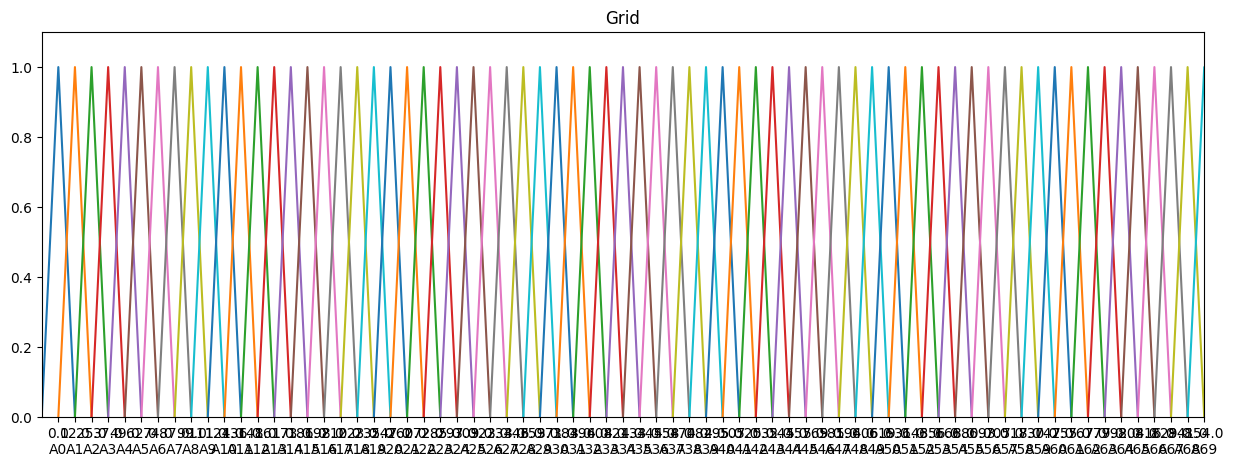

In [113]:
from pyFTS.partitioners import Grid

data = datasets1['Spain']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

High Order FTS:
A0,A0,A2,A1 -> A0
A0,A0,A2,A2 -> A0
A0,A1,A2,A1 -> A0
A0,A1,A2,A2 -> A0
A1,A0,A2,A1 -> A0
A1,A0,A2,A2 -> A0
A1,A1,A2,A1 -> A0
A1,A1,A2,A2 -> A0
A2,A0,A1,A2 -> A0
A2,A0,A2,A1 -> A0
A2,A0,A2,A2 -> A0
A0,A0,A0,A3 -> A0
A2,A0,A10,A0 -> A0
A2,A0,A10,A1 -> A0
A2,A0,A11,A0 -> A0
A2,A0,A11,A1 -> A0
A3,A0,A10,A0 -> A0
A3,A0,A10,A1 -> A0
A3,A0,A11,A0 -> A0
A3,A0,A11,A1 -> A0
A0,A10,A1,A0 -> A0
A0,A11,A0,A0 -> A0
A0,A11,A1,A0 -> A0
A1,A0,A0,A12 -> A0
A1,A0,A0,A13 -> A0
A2,A0,A0,A12 -> A0
A2,A0,A0,A13 -> A0
A0,A0,A12,A0 -> A0
A0,A0,A13,A0 -> A0
A0,A0,A0,A4 -> A0
A0,A0,A4,A0 -> A0
A3,A0,A0,A22 -> A0
A3,A0,A0,A23 -> A0
A4,A0,A0,A22 -> A0
A4,A0,A0,A23 -> A0
A0,A0,A22,A0 -> A0
A0,A0,A23,A0 -> A0
A0,A22,A0,A0 -> A0
A0,A0,A0,A44 -> A0
A0,A0,A0,A45 -> A0
A0,A0,A44,A0 -> A0
A0,A0,A45,A0 -> A0
A0,A44,A0,A0 -> A0
A0,A45,A0,A0 -> A0
A0,A0,A0,A23 -> A0
A0,A0,A0,A24 -> A0
A0,A0,A24,A0 -> A0
A23,A0,A0,A22 -> A0
A23,A0,A0,A23 -> A0
A24,A0,A0,A22 -> A0
A24,A0,A0,A23 -> A0
A0,A0,A0,A16 -> A0
A0,A0,

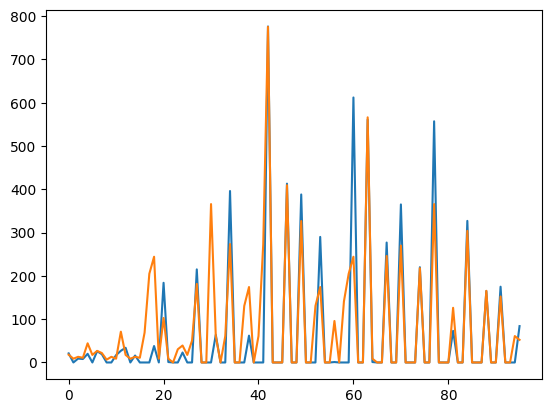

In [114]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import hofts
from pyFTS.common import Util as cUtil

#train = Enrollments.get_data()
train = data1.values
#test = Enrollments.get_data()
test = data1.values

ordem = 4
particao = 50

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=particao)

# Create an empty model using the hofts method
model = hofts.HighOrderFTS(partitioner=partitioner,order=ordem)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)

#calculo maximo minimo e diferenca para utilizar calculo de erro percentual
#calculo de erro percentual
maxvalue = max(test)
minValue = min(test)
diffRange = maxvalue - minValue

#Plot
plt.plot(test[ordem:])
plt.plot(forecasts)

Estatísticas de Erro das Previsões Espanha - High Order Fuzzy Logical Relationship Group

In [115]:
#Calculo de Erro
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test[ordem:],forecasts)
MAE = mean_absolute_error(test[ordem:],forecasts)
MAPE = mean_absolute_percentage_error(test[ordem:],forecasts)
MedAE = median_absolute_error(test[ordem:],forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test[ordem:],forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 6888.94
MAE = 38.29
MAPE = 88009380937458928.00
MedAE = 3.03
RMSE = 83.00
ME = 367.82


Dados França

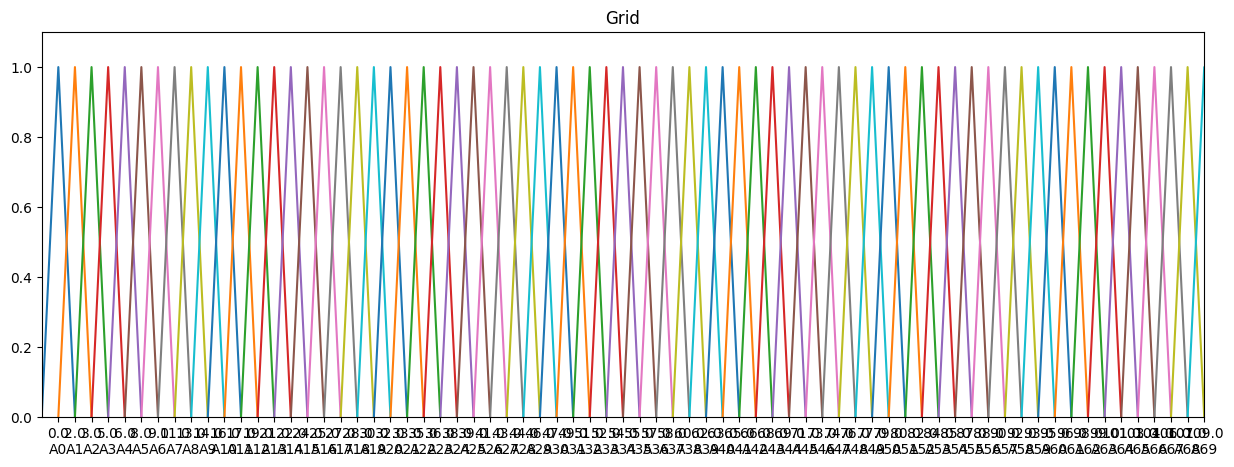

In [116]:
from pyFTS.partitioners import Grid

data = datasets1['France']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

High Order FTS:
A9,A8,A5,A0 -> A0
A9,A8,A6,A0 -> A0
A9,A9,A5,A0 -> A0
A9,A9,A6,A0 -> A0
A10,A8,A5,A0 -> A0
A10,A8,A6,A0 -> A0
A10,A9,A5,A0 -> A0
A10,A9,A6,A0 -> A0
A5,A0,A0,A11 -> A0
A5,A0,A0,A12 -> A0
A6,A0,A0,A11 -> A0
A6,A0,A0,A12 -> A0
A0,A11,A0,A16 -> A0
A0,A11,A0,A17 -> A0
A0,A12,A0,A16 -> A0
A0,A12,A0,A17 -> A0
A0,A16,A0,A9 -> A0
A0,A16,A0,A10 -> A0
A0,A17,A0,A9 -> A0
A0,A17,A0,A10 -> A0
A9,A0,A2,A1 -> A0
A9,A0,A2,A2 -> A0
A9,A0,A3,A1 -> A0
A9,A0,A3,A2 -> A0
A10,A0,A2,A1 -> A0
A10,A0,A2,A2 -> A0
A10,A0,A3,A1 -> A0
A10,A0,A3,A2 -> A0
A2,A1,A0,A44 -> A0
A2,A1,A0,A45 -> A0
A2,A2,A0,A44 -> A0
A2,A2,A0,A45 -> A0
A3,A1,A0,A44 -> A0
A3,A1,A0,A45 -> A0
A3,A2,A0,A44 -> A0
A3,A2,A0,A45 -> A0
A0,A7,A16,A3 -> A0
A0,A7,A16,A4 -> A0
A0,A7,A17,A3 -> A0
A0,A7,A17,A4 -> A0
A0,A8,A16,A3 -> A0
A0,A8,A16,A4 -> A0
A0,A8,A17,A3 -> A0
A0,A8,A17,A4 -> A0
A7,A16,A3,A0 -> A0
A7,A16,A4,A0 -> A0
A7,A17,A3,A0 -> A0
A7,A17,A4,A0 -> A0
A8,A16,A3,A0 -> A0
A8,A16,A4,A0 -> A0
A8,A17,A3,A0 -> A0
A8,A17,A4,A0 -> A

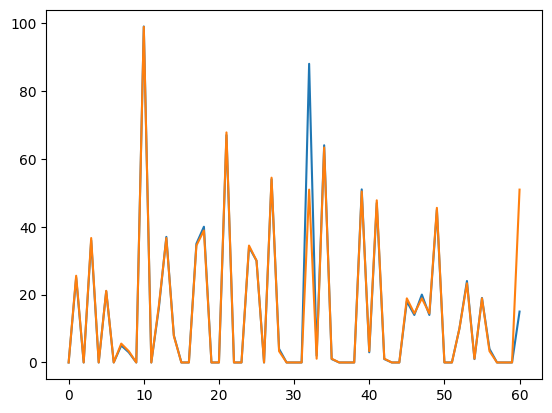

In [117]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import hofts
from pyFTS.common import Util as cUtil

#train = Enrollments.get_data()
train = data1.values[35:]
#test = Enrollments.get_data()
test = data1.values[35:]

ordem = 4
particao = 50

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=particao)

# Create an empty model using the hofts method
model = hofts.HighOrderFTS(partitioner=partitioner,order=ordem)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)

#calculo maximo minimo e diferenca para utilizar calculo de erro percentual
#calculo de erro percentual
maxvalue = max(test)
minValue = min(test)
diffRange = maxvalue - minValue


#Plot
plt.plot(test[ordem:])
plt.plot(forecasts)

Estatísticas de Erro das Previsões França - High Order Fuzzy Logical Relationship Group

In [118]:
#Calculo de Erro
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test[ordem:],forecasts)
MAE = mean_absolute_error(test[ordem:],forecasts)
MAPE = mean_absolute_percentage_error(test[ordem:],forecasts)
MedAE = median_absolute_error(test[ordem:],forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test[ordem:],forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 43.87
MAE = 1.46
MAPE = 0.08
MedAE = 0.11
RMSE = 6.62
ME = 37.07


Dados Reino Unido

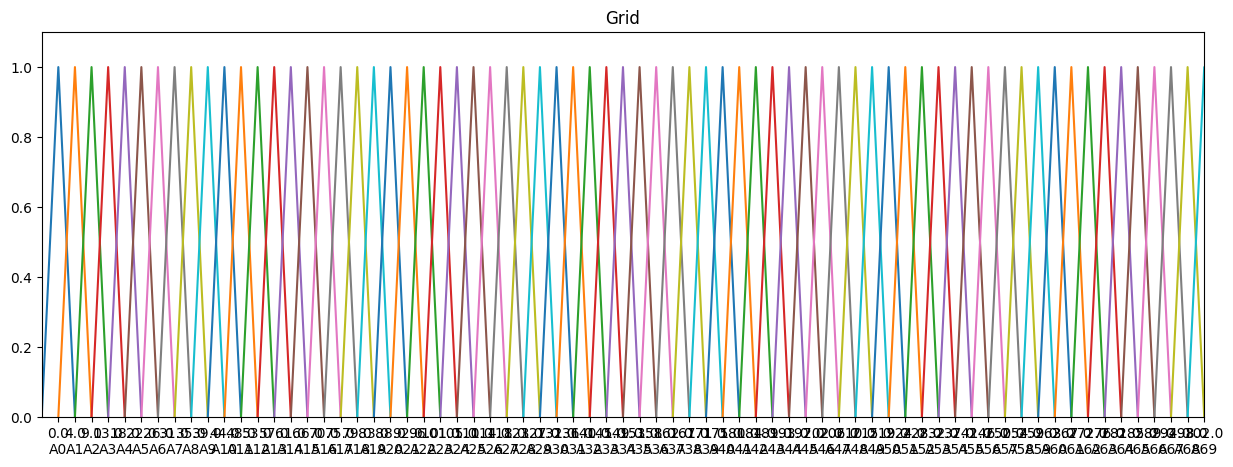

In [119]:
from pyFTS.partitioners import Grid

data = datasets1['UK']

data1 = data[:100]

fs = Grid.GridPartitioner(data=data1,npart=70)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

High Order FTS:
A0,A0,A0,A14 -> A0
A0,A0,A0,A15 -> A0
A0,A0,A14,A0 -> A0
A0,A0,A15,A0 -> A0
A0,A14,A0,A0 -> A0
A0,A15,A0,A0 -> A0
A0,A0,A0,A9 -> A0
A0,A0,A0,A10 -> A0
A0,A0,A9,A0 -> A0
A0,A0,A10,A0 -> A0
A9,A0,A0,A18 -> A0
A9,A0,A0,A19 -> A0
A10,A0,A0,A18 -> A0
A10,A0,A0,A19 -> A0
A0,A0,A18,A0 -> A0
A0,A0,A19,A0 -> A0
A0,A0,A0,A17 -> A0
A0,A0,A0,A18 -> A0
A0,A0,A17,A0 -> A0
A17,A0,A0,A11 -> A0
A17,A0,A0,A12 -> A0
A18,A0,A0,A11 -> A0
A18,A0,A0,A12 -> A0
A0,A0,A11,A0 -> A0
A0,A0,A12,A0 -> A0
A0,A11,A0,A0 -> A0
A0,A12,A0,A0 -> A0
A0,A0,A0,A26 -> A0
A0,A0,A0,A27 -> A0
A0,A0,A26,A0 -> A0
A0,A0,A27,A0 -> A0
A26,A0,A0,A6 -> A0
A26,A0,A0,A7 -> A0
A27,A0,A0,A6 -> A0
A27,A0,A0,A7 -> A0
A0,A0,A6,A0 -> A0
A0,A0,A7,A0 -> A0
A0,A6,A0,A0 -> A0
A0,A7,A0,A0 -> A0
A26,A0,A0,A4 -> A0
A26,A0,A0,A5 -> A0
A27,A0,A0,A4 -> A0
A27,A0,A0,A5 -> A0
A0,A0,A4,A0 -> A0
A0,A0,A5,A0 -> A0
A0,A4,A0,A0 -> A0
A0,A5,A0,A0 -> A0
A0,A0,A0,A19 -> A0
A0,A0,A0,A20 -> A0
A0,A0,A20,A0 -> A0
A19,A0,A0,A8 -> A0
A19,A0,A0,A9 -> A0


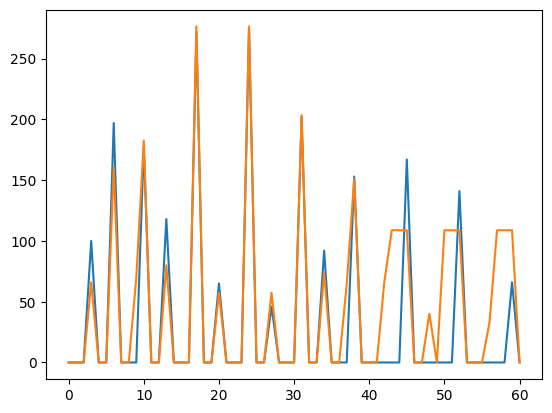

In [120]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import hofts
from pyFTS.common import Util as cUtil

#train = Enrollments.get_data()
train = data1.values[35:]
#test = Enrollments.get_data()
test = data1.values[35:]

ordem = 4
particao = 50

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=30)

# Create an empty model using the hofts method
model = hofts.HighOrderFTS(partitioner=partitioner,order=4)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)

#calculo maximo minimo e diferenca para utilizar calculo de erro percentual
#calculo de erro percentual
maxvalue = max(test)
minValue = min(test)
diffRange = maxvalue - minValue

#Plot
plt.plot(test[ordem:])
plt.plot(forecasts)

Estatísticas de Erro das Previsões Reino Unido - High Order Fuzzy Logical Relationship Group

In [121]:
#Calculo de Erro
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error

MSE = mean_squared_error(test[ordem:],forecasts)
MAE = mean_absolute_error(test[ordem:],forecasts)
MAPE = mean_absolute_percentage_error(test[ordem:],forecasts)
MedAE = median_absolute_error(test[ordem:],forecasts)
RMSE = np.sqrt(MSE)
ME = max_error(test[ordem:],forecasts)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}".format(MAPE))
print("MedAE = {:0.2f}".format(MedAE))
print("RMSE = {:0.2f}".format(RMSE))
print("ME = {:0.2f}".format(ME))

MSE = 1602.55
MAE = 19.96
MAPE = 68338811716210080.00
MedAE = 0.00
RMSE = 40.03
ME = 108.78
